<a href="https://colab.research.google.com/github/Izect/CSST-101-3A/blob/main/3A_TEA%C3%91O_EXER4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

. Install the Required Library

In [1]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.6 MB/s eta 0:00:00


2.Import Libraries:

In [2]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from pgmpy.inference import BeliefPropagation
from pgmpy.factors.discrete import TabularCPD

Exercise 2: Building a Simple Bayesian Network

1. Define the Structure:

In [4]:
model = BayesianModel([('Weather', 'Traffic'), ('Traffic','Late')])

Define Conditional Probability Tables (CPTs)

In [6]:
cpd_weather = TabularCPD(variable='Weather', variable_card=2, values=[[0.8], [0.2]])
cpd_traffic = TabularCPD(variable='Traffic', variable_card=2,
                          values=[[0.9, 0.5], [0.1, 0.5]],
                          evidence=['Weather'], evidence_card=[2])

cpd_late = TabularCPD(variable='Late', variable_card=2,
                      values=[[0.95, 0.4], [0.05, 0.6]],
                      evidence=['Traffic'], evidence_card=[2])

model.add_cpds(cpd_weather, cpd_traffic, cpd_late)

assert model.check_model()

Exercise 3: Querying the Bayesian Network

Perform Exact Inference:


In [7]:

inference = VariableElimination(model)

result = inference.query(variables=['Late'], evidence={'Weather': 1})
print(result)


+---------+-------------+
| Late    |   phi(Late) |
+=========+=============+
| Late(0) |      0.6750 |
+---------+-------------+
| Late(1) |      0.3250 |
+---------+-------------+


Exercise 4: Parameter Learning

Simulate a Dataset:


In [8]:
data = pd.DataFrame({
    'Weather': np.random.choice([0, 1], size=1000, p=[0.8, 0.2]),
    'Traffic': np.nan,
    'Late': np.nan,
})

data.loc[data['Weather'] == 0, 'Traffic'] = np.random.choice(
    [0, 1],
    size=data[data['Weather'] == 0].shape[0],
    p=[0.9, 0.1]
)

data.loc[data['Weather'] == 1, 'Traffic'] = np.random.choice(
    [0, 1],
    size=data[data['Weather'] == 1].shape[0],
    p=[0.5, 0.5]
)

data['Late'] = np.where(
    data['Traffic'] == 0,
    np.random.choice([0, 1], size=data.shape[0], p=[0.95, 0.05]),
    np.random.choice([0, 1], size=data.shape[0], p=[0.4, 0.6])
)

Estimate the Parameters:

In [9]:
from pgmpy.estimators import MaximumLikelihoodEstimator

model = BayesianModel([('Weather', 'Traffic'), ('Traffic', 'Late')])

model.fit(data, estimator=MaximumLikelihoodEstimator)

for cpd in model.get_cpds():
    print(cpd)


+------------+-------+
| Weather(0) | 0.818 |
+------------+-------+
| Weather(1) | 0.182 |
+------------+-------+
+--------------+---------------------+--------------------+
| Weather      | Weather(0)          | Weather(1)         |
+--------------+---------------------+--------------------+
| Traffic(0.0) | 0.8850855745721271  | 0.4230769230769231 |
+--------------+---------------------+--------------------+
| Traffic(1.0) | 0.11491442542787286 | 0.5769230769230769 |
+--------------+---------------------+--------------------+
+---------+---------------------+--------------------+
| Traffic | Traffic(0.0)        | Traffic(1.0)       |
+---------+---------------------+--------------------+
| Late(0) | 0.9325842696629213  | 0.4271356783919598 |
+---------+---------------------+--------------------+
| Late(1) | 0.06741573033707865 | 0.5728643216080402 |
+---------+---------------------+--------------------+


Exercise 5: Visualizing the Bayesian Network

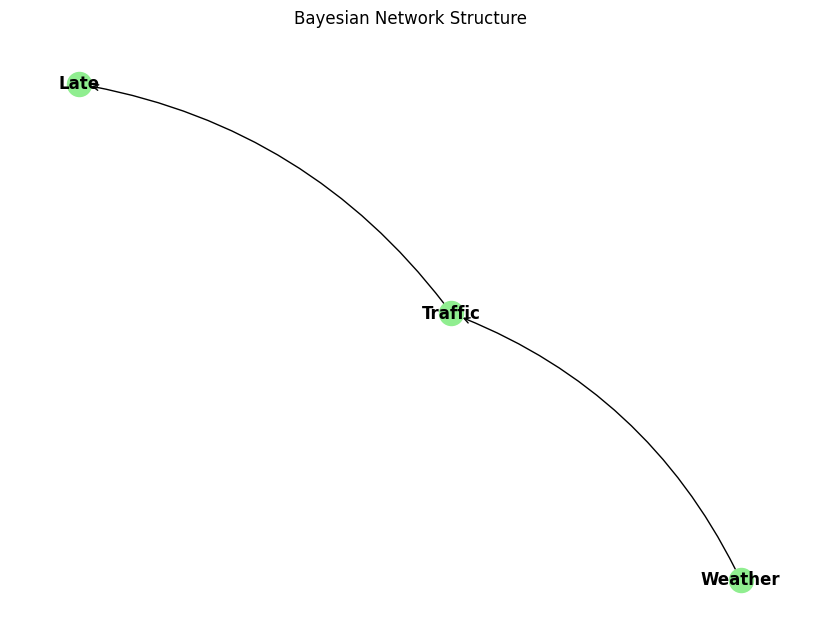

In [10]:
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.models import BayesianModel

nx_graph = nx.DiGraph()
nx_graph.add_edges_from(model.edges())

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(nx_graph)
nx.draw(nx_graph, pos, with_labels=True, node_color='lightgreen',
        font_weight='bold', arrows=True, arrowstyle='->', connectionstyle='arc3,rad=0.2')

plt.title('Bayesian Network Structure')
plt.show()
